In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.feature, librosa.display
import das.utils_plot, das.predict, das.train, das.utils_plot
from pprint import pprint

plt.style.use('../ncb.mplstyle')

In [2]:
# import flammkuchen
# res = flammkuchen.load('model_pulse/20200401_044203_results.h5')
# print(list(res.keys()))
# res_sine = flammkuchen.load('model_sine/20200331_154305_results.h5')
# print(list(res.keys()))
# np.savez('data.npz', x=res['x_test'], y_true_pulse=res['y_test'], y_true_sine=res_sine['y_test'], samplerate_Hz=10_000)

In [3]:
with np.load('data.npz') as f:
    x = f['x']  # audio data
    y_true_pulse = f['y_true_pulse']  # manual annotations (groundtruth)
    y_true_sine = f['y_true_sine']  # manual annotations (groundtruth)
    samplerate_Hz = f['samplerate_Hz']  # audio sample rate

In [4]:
model_path_pulse = 'model_pulse/20200401_044203'
events, _, pulse_probabilities, pulse_class_names = das.predict.predict(x, model_path_pulse, event_thres=0.5, event_dist=0.01)

/Users/clemens10/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/layers/core.py:1061: UserWarning: dss.tcn.tcn is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)
/Users/clemens10/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [5]:
model_path_sine = 'model_sine/20200331_154305'
_, segments, sine_probabilities, sine_class_names = das.predict.predict(x, model_path_sine, segment_minlen=0.02, segment_fillgap=0.02)

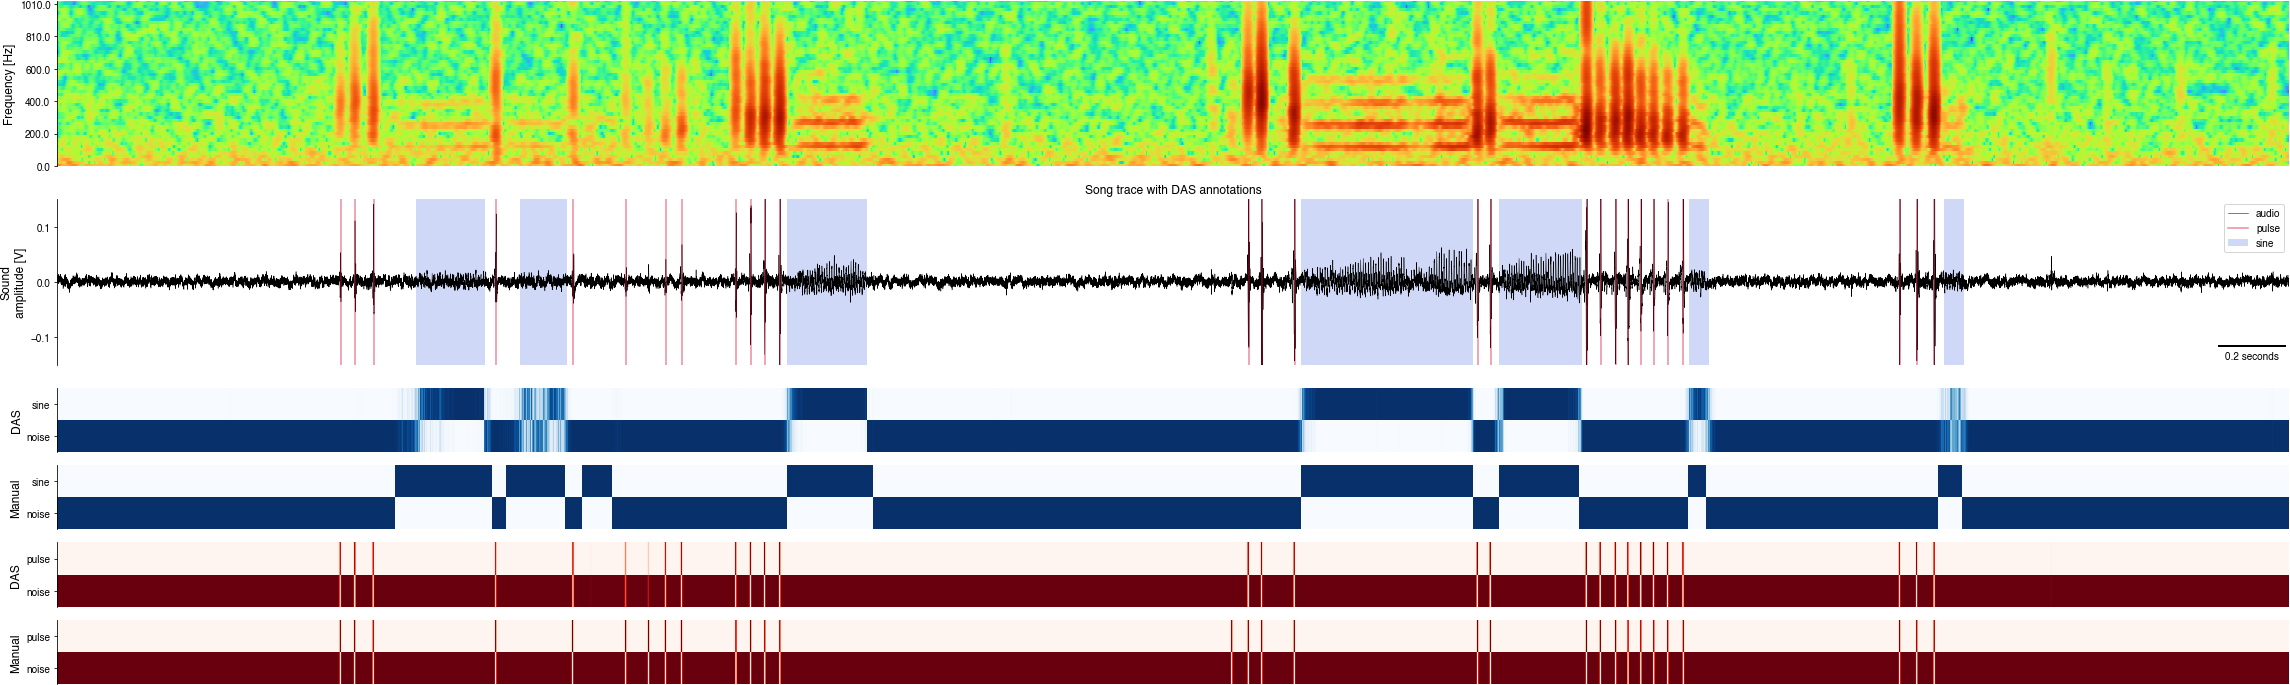

In [7]:
i0, i1 = int(1.25e5), int(1.9e5)
T = np.arange(i0, i1) / samplerate_Hz

specgram = librosa.feature.melspectrogram(x[i0:i1, 0], sr=samplerate_Hz, n_fft=512, hop_length=16, power=1)
specgram = librosa.amplitude_to_db(specgram, ref=np.max(specgram))
freqs = np.round(librosa.mel_frequencies(n_mels=128, fmin=0.0, fmax=samplerate_Hz/2, htk=False)/10) * 10

plt.figure(figsize=(40, 14))
plt.subplot(4, 1, 1)
plt.imshow(specgram, cmap='turbo')
plt.ylim(0, 51)
plt.yticks(np.arange(0, 51, 10), freqs[np.arange(0, 51, 10)])
plt.ylabel('Frequency [Hz]')
das.utils_plot.despine(which='tbr')

plt.subplot(4, 1, 2)
plt.plot(T, x[i0:i1, 0], c='k', linewidth=0.5, label='audio')
das.utils_plot.annotate_events(event_seconds=events['seconds'], event_names=events['sequence'], tmin=T[0], tmax=T[-1], color='crimson')
das.utils_plot.annotate_segments(onset_seconds=segments['onsets_seconds'], offset_seconds=segments['offsets_seconds'], segment_names=segments['sequence'], tmin=T[0], tmax=T[-1], color='royalblue')
plt.xlim(T[0], T[-1])
plt.ylim(-0.15, 0.15)
plt.yticks(np.arange(-0.1, 0.15, 0.1))
plt.legend(loc='upper right', frameon=True, facecolor='w')
plt.ylabel('Sound\namplitude [V]')
plt.title('Song trace with DAS annotations')
das.utils_plot.despine(which='tbr')
das.utils_plot.scalebar(length=0.2, units='seconds')

plt.subplot(10, 1, 6)
plt.imshow(sine_probabilities[i0:i1, :].T, cmap='Blues')
plt.yticks(np.arange(len(sine_class_names)), labels=sine_class_names)
plt.ylabel('DAS')
das.utils_plot.despine(which='tbr')

plt.subplot(10, 1, 7)
plt.imshow(y_true_sine[i0:i1].T, cmap='Blues')
plt.yticks(np.arange(len(sine_class_names)), labels=sine_class_names)
plt.ylabel('Manual')
das.utils_plot.despine(which='tbr')

plt.subplot(10, 1, 8)
plt.imshow(pulse_probabilities[i0:i1, :].T, cmap='Reds')
plt.yticks(np.arange(len(pulse_class_names)), labels=pulse_class_names)
plt.ylabel('DAS')
das.utils_plot.despine(which='tbr')

plt.subplot(10, 1, 9)
plt.imshow(y_true_pulse[i0:i1].T, cmap='Reds')
plt.yticks(np.arange(len(pulse_class_names)), labels=pulse_class_names)
plt.ylabel('Manual')
das.utils_plot.despine(which='tbr')

plt.show()